Accuracy: 0.9705882352941176


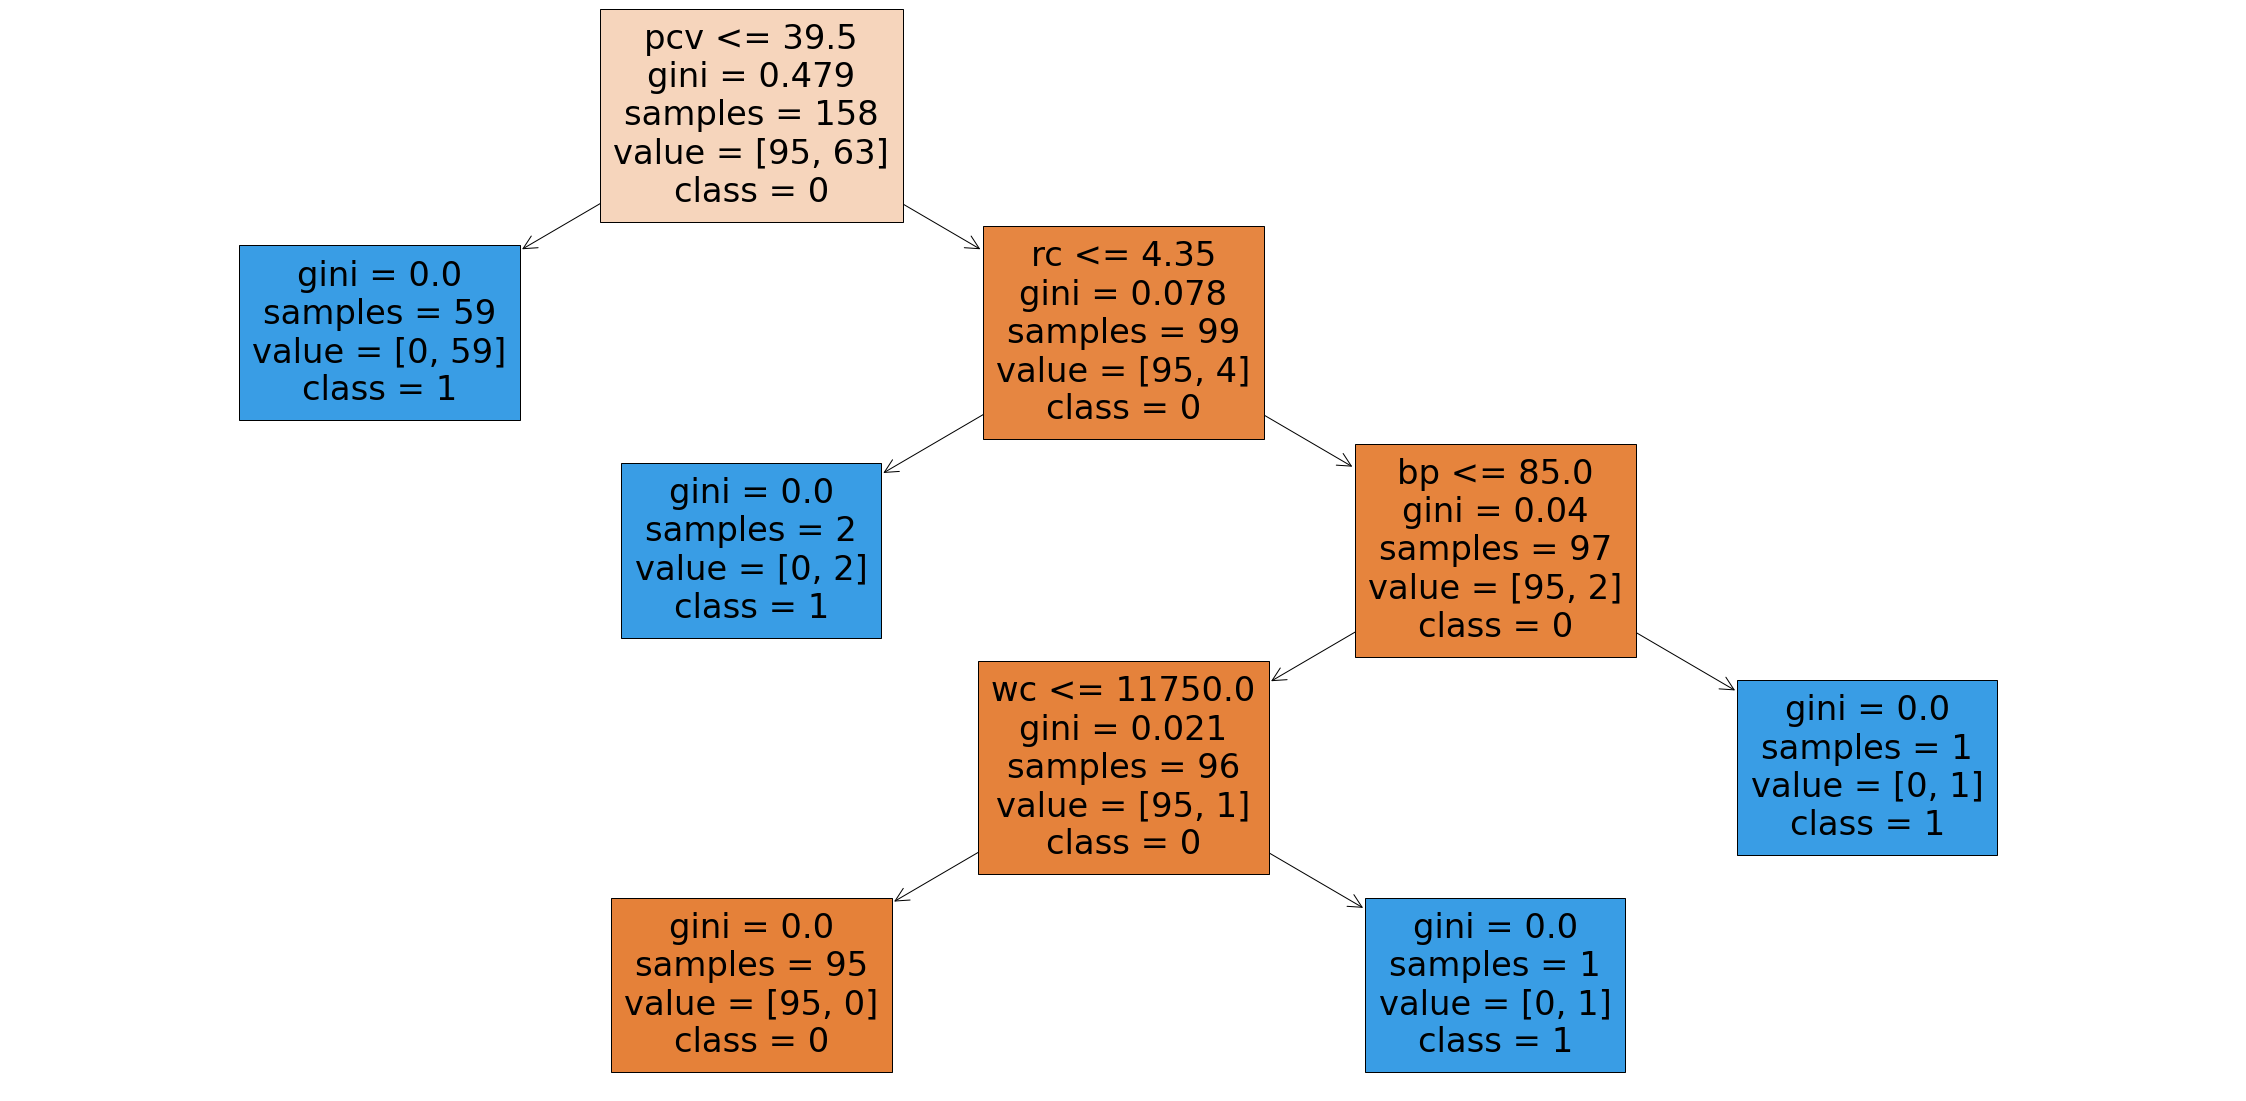

In [17]:
# Question 1 

import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('/Users/hetvikavi/Desktop/STAT 1P50/kidney_disease.csv')

X, y = data.drop(['ckd'],axis=1), data[['ckd']]

feature_names = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


plt.show()
fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names=feature_names,
class_names=['0','1'], filled=True)
plt.savefig('tree.pdf')

In [30]:
# Question 2 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

# load dataset
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

scaler = MinMaxScaler()

y = y.reshape(-1,1)
y = scaler.fit_transform(y)

## you need to
## 1. train a neural network model to predict diabetes
## progression with or without the 'relu' activation function
## for the output layer
## 2. Measure the performance of the models on the
## testing set

#given data using relu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

mlp = MLPRegressor(hidden_layer_sizes=(8), activation='relu', max_iter=10)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

print("The Score with ", (mean_absolute_error(predict_test, y_test)))


#given data without using relu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

mlp = MLPRegressor(hidden_layer_sizes=(8), activation='identity', max_iter=10)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

print("The Score with ", (mean_absolute_error(predict_test, y_test)))



(309, 10)
(133, 10)
The Score with  0.4420066469398032
(309, 10)
(133, 10)
The Score with  0.25820511378650257


/Users/hetvikavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hetvikavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hetvikavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hetvikavi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Opt

In [29]:
#Question 4

from tensorflow.keras.datasets import mnist

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

number_of_training_instances = X_train.shape[0]
number_of_testing_instances = X_test.shape[0]

# reshape dataset
X_train = X_train.reshape((number_of_training_instances, 28*28))
X_test = X_test.reshape((number_of_testing_instances, 28*28))


## you need to
## 1. Train a neural network model to predict digits
## with an arbitrary number of hidden layers and neurons
# add first hidden layer
## 2. Measure the accuracy on the testing set
## 3. Save the model in 'digits_model.h5'

model.add(Dense(32,activation='relu',input_dim=8))
# Second hidden layer
model.add(Dense(16,activation='relu'))
# Output layer
model.add(Dense(1,activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# Training for 200 epochs
model.fit(X_train,y_train,epochs=200)

# Train and Test accuracy and pl
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
y_test_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()



ModuleNotFoundError: No module named 'tensorflow'